# **Load The Dataset**

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
Data_trainpath='/content/drive/MyDrive/Dataset/TRAIN_SET'

In [30]:
Data_testpath='/content/drive/MyDrive/Dataset/TEST_SET'

# **Image Preprocessing**

**Import The ImageDataGenerator Library**

In [31]:
from keras.preprocessing.image import ImageDataGenerator

**Configure ImageDataGenerator Class**

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [33]:
test_datagen=ImageDataGenerator(rescale=1./255)

**Apply Image DataGenerator Functionality To Trainset And Testset**

In [34]:
x_train = train_datagen.flow_from_directory(Data_trainpath,target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 3388 images belonging to 3 classes.


In [35]:
x_test = train_datagen.flow_from_directory(Data_testpath,target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 929 images belonging to 3 classes.


In [36]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [37]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2}


In [38]:
from collections import Counter as c 
c(x_train .labels)

Counter({0: 995, 1: 1374, 2: 1019})

# **Model Building**

**Importing The Model Building Libraries**

In [39]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

**Initializing The Model**

In [40]:
model=Sequential()

**Adding CNN Layers**

First Convolution Layer and pooling

In [41]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Second Convolution Layer and pooling

In [42]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Flatten layer

In [43]:
model.add(Flatten())

**Adding Dense Layers**

In [44]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=5, activation='softmax')) 

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

**Configure The Learning Process**

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

**Train The Model**

In [47]:
model.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=15, validation_data=x_test,validation_steps = len(x_test))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


678/678 [==============================] - 45s 65ms/step - loss: 0.6178 - accuracy: 0.7491 - val_loss: 0.5399 - val_accuracy: 0.7933
Epoch 2/15
678/678 [==============================] - 40s 59ms/step - loss: 0.5052 - accuracy: 0.8061 - val_loss: 0.5715 - val_accuracy: 0.7621
Epoch 3/15
678/678 [==============================] - 38s 56ms/step - loss: 0.4508 - accuracy: 0.8267 - val_loss: 0.4669 - val_accuracy: 0.8159
Epoch 4/15
678/678 [==============================] - 39s 58ms/step - loss: 0.4211 - accuracy: 0.8388 - val_loss: 0.4147 - val_accuracy: 0.8288
Epoch 5/15
678/678 [==============================] - 39s 58ms/step - loss: 0.3935 - accuracy: 0.8430 - val_loss: 0.4079 - val_accuracy: 0.8461
Epoch 6/15
678/678 [==============================] - 40s 59ms/step - loss: 0.3715 - accuracy: 0.8563 - val_loss: 0.4329 - val_accuracy: 0.8385
Epoch 7/15
678/678 [==============================] - 40s 59ms/step - loss: 0.3706 - accuracy: 0.8586 - val_loss: 0.4094 - val_accuracy: 0.8471
Epo

**Save The Model**

In [48]:
model.save('nutrition.h5')

**Test The Model**

In [49]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
final_model = load_model("nutrition.h5")

In [50]:
from tensorflow.keras.utils import img_to_array

In [51]:
img = tensorflow.keras.utils.load_img("/content/drive/MyDrive/Nutrition Image Analysis using CNN and Rapid API/Nutrition Analysis Using Image Classification/Flask/Sample_Images/Test_Image4.jpg",grayscale=False,target_size= (64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(final_model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 115ms/step


array([2])

In [52]:
index=['APPLES', 'BANANA', 'ORANGE']
result=index[pred[0]]
result

'ORANGE'

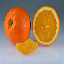

In [53]:
img

In [57]:
img = tensorflow.keras.utils.load_img("/content/drive/MyDrive/Nutrition Image Analysis using CNN and Rapid API/Nutrition Analysis Using Image Classification/Flask/Sample_Images/Test_Image1.jpg",grayscale=False,target_size= (64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(final_model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 21ms/step


array([0])

In [58]:
index=['APPLES', 'BANANA', 'ORANGE']
result=index[pred[0]]
result

'APPLES'

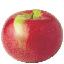

In [59]:
img